Results from Level IW algorithm (for boxplot and accuracy timelime).
One Class Horizontal Translation. 2 Dimensional data.
100 batches of 152 instances



METHOD: Static sgd as classifier
Execution time:  0.04002098570388429
Average MCC:  0.973074634178
Average macro-F1: 0.9861955140101528
Average Accuracy:  98.6702
Standard Deviation:  1.53948431626
Variance:  2.37001196


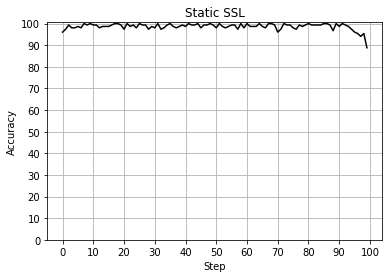

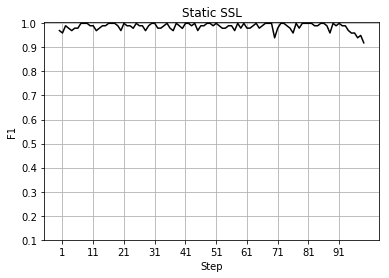




METHOD: Sliding sgd as classifier
Execution time:  0.10393928368112626
Average MCC:  0.922030673209
Average macro-F1: 0.9580569730833898
Average Accuracy:  96.0784
Standard Deviation:  3.51811134559
Variance:  12.37710744


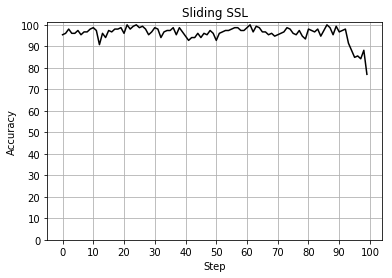

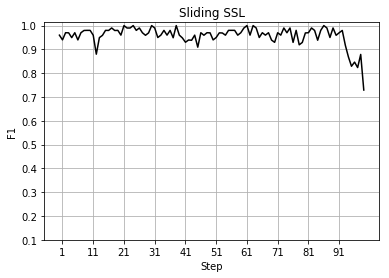




METHOD: Incremental sgd as classifier
Execution time:  0.5992493028139885
Average MCC:  0.888746173701
Average macro-F1: 0.9405728574544889
Average Accuracy:  94.0982
Standard Deviation:  2.44265076505
Variance:  5.96654276


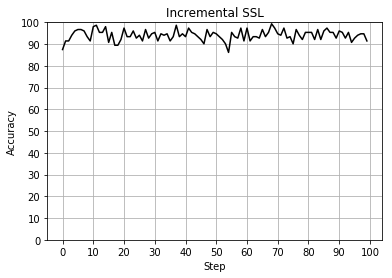

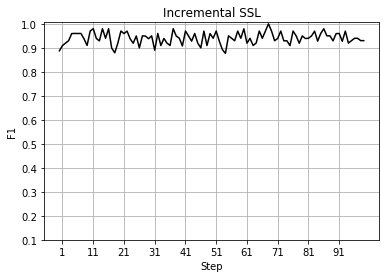




METHOD: sgd as classifier and kde as core support extraction with cutting data method
Execution time:  0.9156151098648215
Average MCC:  0.991057047277
Average macro-F1: 0.9954824757482349
Average Accuracy:  99.592
Standard Deviation:  1.15378680873
Variance:  1.331224


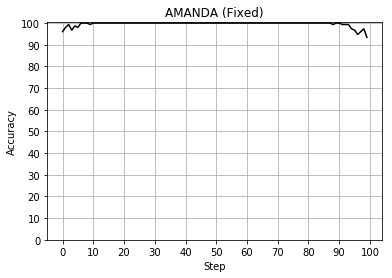

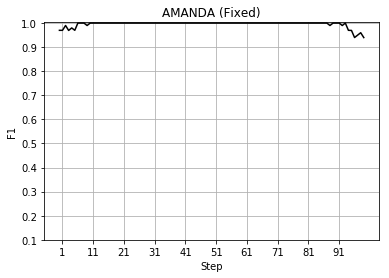




METHOD: sgd as classifier and kde and Hellinger distance as dynamic CSE
Execution time:  4.973055573004136
Average MCC:  0.991312138831
Average macro-F1: 0.995582405407558
Average Accuracy:  99.5327
Standard Deviation:  1.17457980146
Variance:  1.37963771


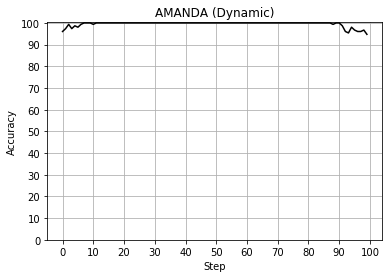

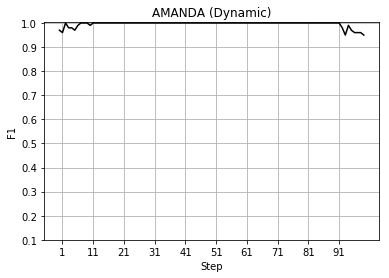




METHOD: None as classifier and GMM with BIC and Mahalanobis as core support extraction
Execution time:  20.724477303084214
Average MCC:  0.990106016894
Average macro-F1: 0.9948668637840369
Average Accuracy:  99.5197
Standard Deviation:  1.35720334143
Variance:  1.84200091


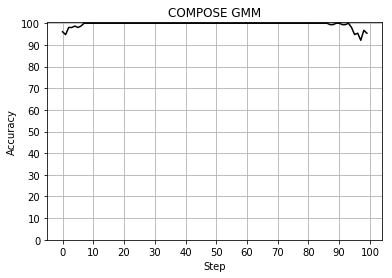

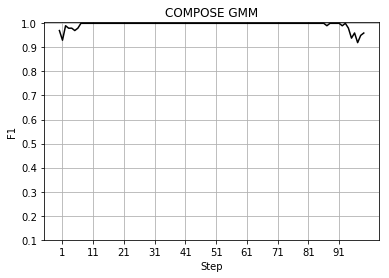




Method: Level IW
Execution time:  20.724477303084214
Average MCC:  -0.00354189872723
Average F1:  0.166083794305
Average Accuracy: 

C:\Users\raul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\raul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


 99.60526
Standard Deviation:  1.07702871772
Variance:  1.1599908588


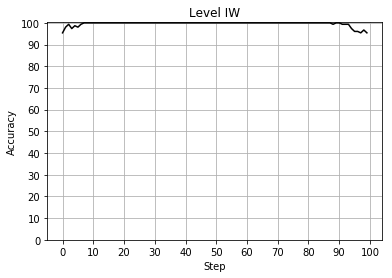

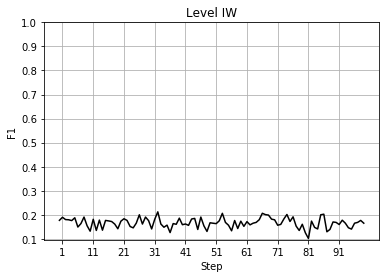

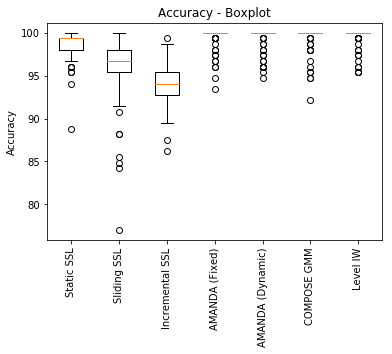

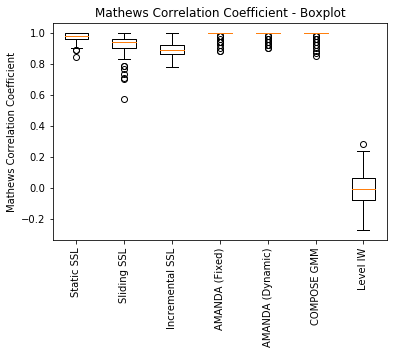

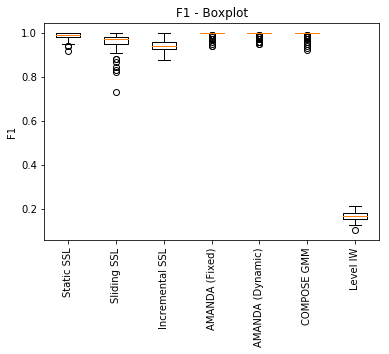

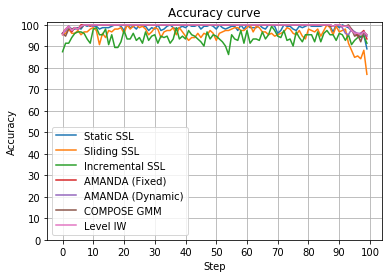

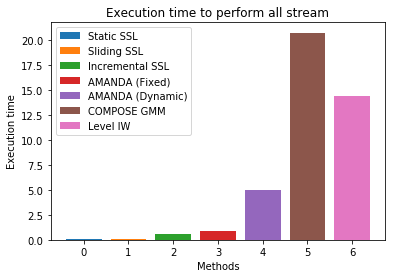

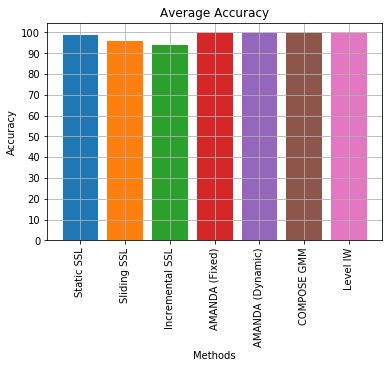

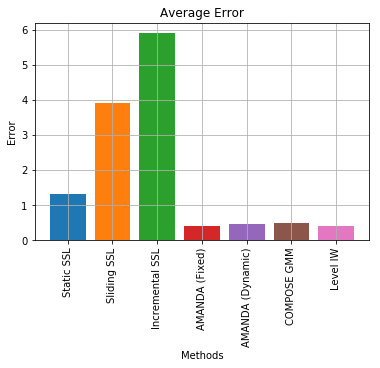

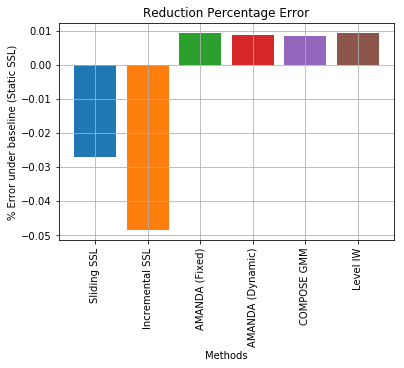

In [1]:
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[3])

import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    sslClassifier = 'sgd' # lp = label propagation, rf = random forests, nb = naive bayes, knn = k-nn, sgd = stochastic gradient descent
    steps = 100
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = True
    isImbalanced = False
    externalResults = []
    
    # Load dataset
    dataValues, dataLabels, description = setup.loadCHT(path, sep)
    
    # Only 5% of initial labeled data - Extreme verification latency scenario
    labeledData = int(0.05*len(dataLabels))

    # Static SSL
    experiments[0] = Experiment(static_classifier, 5, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 5, clfName=sslClassifier)
    
    # Incremental SSL
    experiments[2] = Experiment(incremental_LN, 5, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    experiments[3] = Experiment(amanda_fixed, 5, 0.6, "kde", clfName=sslClassifier)

    # Proposed method 2 (AMANDA - Dynamic core extraction percentage)
    experiments[4] = Experiment(amanda_dynamic, 5, None, "kde", clfName=sslClassifier)

    # COMPOSE GMM (Python version)
    experiments[5] = Experiment(compose_gmm_version, 5)
    
    # levelIw matlab results
    predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, '1CHT', steps)
    externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw, "accuracies":originalAccsLevelIw, "time":timeLevelIw})
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    

if __name__ == "__main__":
    main()